<a href="https://colab.research.google.com/github/alexandresvifpb/assert_iaiot/blob/main/project_softex_ia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Carregar os dados
url = 'https://raw.githubusercontent.com/alexandresvifpb/assert_iaiot/main/letter-recognition.data'
letter_recognition = pd.read_csv(url, header=None, names=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'])
# print(letter_recognition)

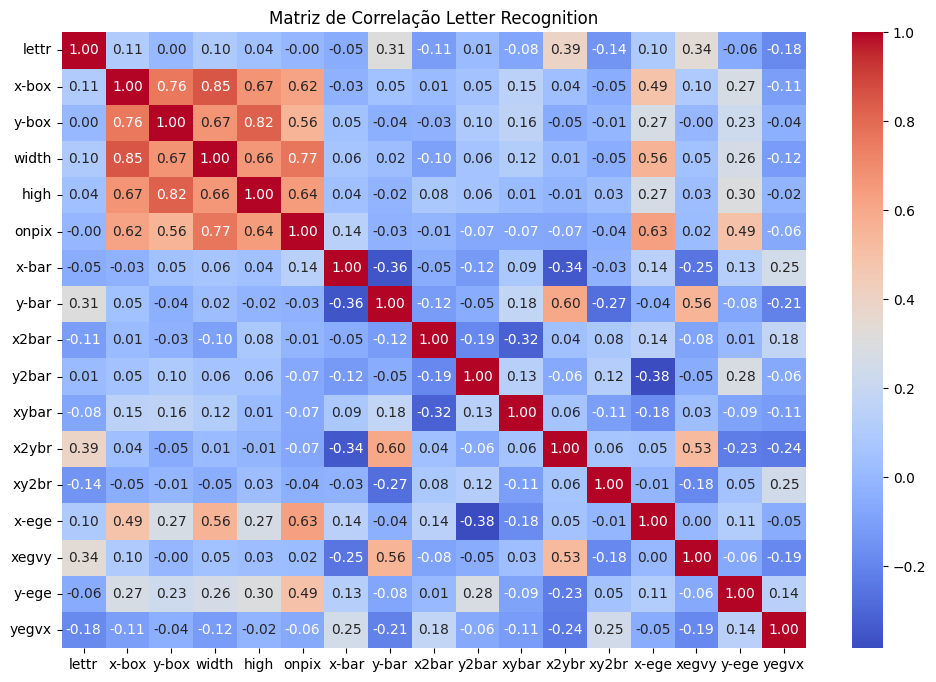

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2.1. Verificar e remover valores nulos
letter_recognition = letter_recognition.dropna()
# print("numero de linhas sem valores nulos: ",len(letter_recognition))

# 2.2. Converter labels para números
label_encoder = LabelEncoder()
letter_recognition['lettr'] = label_encoder.fit_transform(letter_recognition['lettr'])

# 2.3. Verificar se existe correspondência entre features
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = letter_recognition.corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação Letter Recognition")
plt.show()

# 2.4. Normalizar as features na escala 0..1
scaler = MinMaxScaler()
letter_recognition_scaled = pd.DataFrame(scaler.fit_transform(letter_recognition.drop(columns=['lettr'])), columns=letter_recognition.columns[1:])

# Concatenar os labels (lettr) com as features normalizadas
letter_recognition_processed = pd.concat([letter_recognition['lettr'], letter_recognition_scaled], axis=1)
# print("\nDataset após pré-processamento:\n", letter_recognition_processed.head())

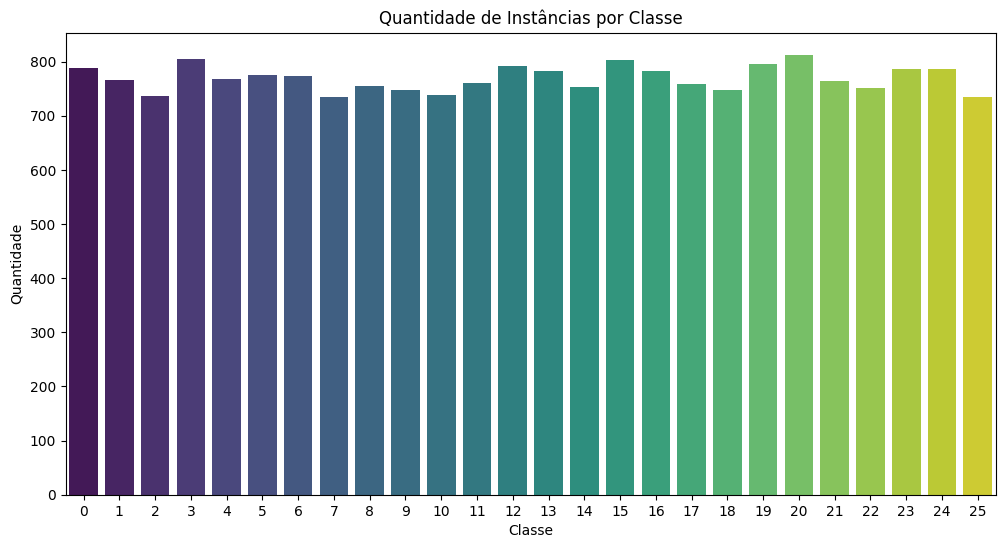

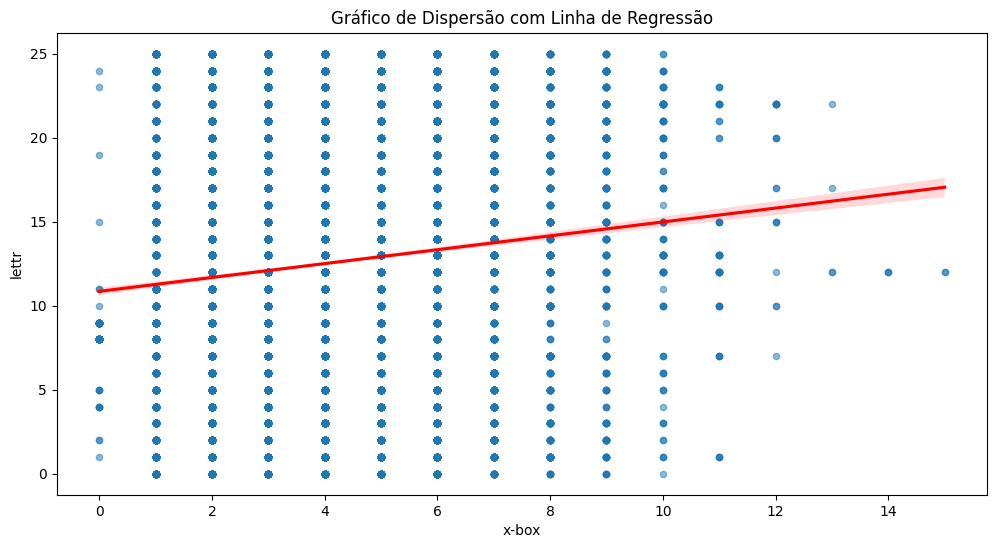

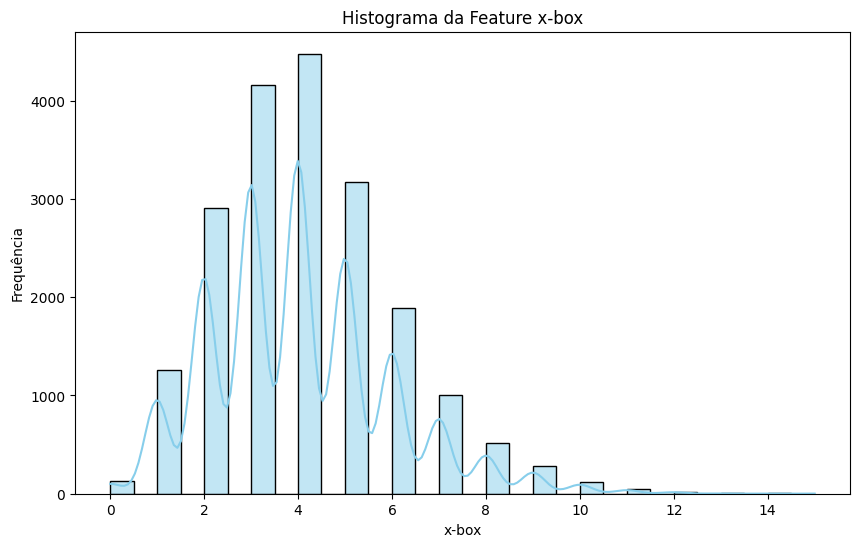

In [3]:
# 3.1 Gráfico de barras por classes
# Contar a quantidade de instâncias por classe
class_counts = letter_recognition['lettr'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Quantidade de Instâncias por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

# 3.2. Gráfico de dispersão com linha de regressão
plt.figure(figsize=(12, 6))
sns.regplot(x='x-box', y='lettr', data=letter_recognition, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Gráfico de Dispersão com Linha de Regressão')
plt.xlabel('x-box')
plt.ylabel('lettr')
plt.show()

# 3.3. Gráfico de distribuição (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(letter_recognition['x-box'], bins=30, color='skyblue', kde=True)
plt.title('Histograma da Feature x-box')
plt.xlabel('x-box')
plt.ylabel('Frequência')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos
# Modelo 1: Árvore de Decisão com critério 'gini' e sem limite de profundidade
dtc_model1 = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc_model1.fit(X_train, y_train)

# Modelo 2: Árvore de Decisão com critério 'entropy' e profundidade máxima de 5
dtc_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=42)
dtc_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 10
accuracies_dtc_model1 = cross_val_score(dtc_model1, X, y, cv=num_executions)
accuracies_dtc_model2 = cross_val_score(dtc_model2, X, y, cv=num_executions)

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_dtc_model1 = accuracies_dtc_model1.mean()
mean_accuracy_dtc_model2 = accuracies_dtc_model2.mean()

print(f'Média de Acurácia para Modelo 1: {mean_accuracy_dtc_model1:.3%}')
print(f'Média de Acurácia para Modelo 2: {mean_accuracy_dtc_model2:.3%}')

Média de Acurácia para Modelo 1: 88.380%
Média de Acurácia para Modelo 2: 88.810%


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos KNN
# Modelo KNN 1: K=3, Métrica Euclidiana
knn_model1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model1.fit(X_train, y_train)

# Modelo KNN 2: K=5, Métrica Manhattan
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 10
accuracies_knn_model1 = cross_val_score(knn_model1, X, y, cv=num_executions)
accuracies_knn_model2 = cross_val_score(knn_model2, X, y, cv=num_executions)

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_knn_model1 = accuracies_knn_model1.mean()
mean_accuracy_knn_model2 = accuracies_knn_model2.mean()

print(f'Média de Acurácia para KNN Modelo 1: {mean_accuracy_knn_model1:.3%}')
print(f'Média de Acurácia para KNN Modelo 2: {mean_accuracy_knn_model2:.3%}')

Média de Acurácia para KNN Modelo 1: 95.610%
Média de Acurácia para KNN Modelo 2: 95.520%


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos MLP
# Modelo MLP 1: Topologia (100, 50), 1000 ciclos, função de ativação adaptive
mlp_model1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate='adaptive', random_state=42)
mlp_model1.fit(X_train, y_train)

# Modelo MLP 2: Topologia (150, 50), 900 ciclos, função de ativação Tangente Hiperbólica
mlp_model2 = MLPClassifier(hidden_layer_sizes=(150, 50), max_iter=900, activation='tanh', random_state=42)
mlp_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 10
accuracies_mlp_model1 = cross_val_score(mlp_model1, X, y, cv=num_executions)
accuracies_mlp_model2 = cross_val_score(mlp_model2, X, y, cv=num_executions)

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_mlp_model1 = accuracies_mlp_model1.mean()
mean_accuracy_mlp_model2 = accuracies_mlp_model2.mean()

print(f'Média de Acurácia para MLP Modelo 1: {mean_accuracy_mlp_model1:.3%}')
print(f'Média de Acurácia para MLP Modelo 2: {mean_accuracy_mlp_model2:.3%}')

Média de Acurácia para MLP Modelo 1: 94.260%
Média de Acurácia para MLP Modelo 2: 94.020%


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos SVM
# Modelo SVM 1: Kernel RBF, C=1, gamma='scale'
svm_model1 = SVC(kernel='rbf', C=1, gamma='scale')
svm_model1.fit(X_train, y_train)

# Modelo SVM 2: Kernel Linear, C=0.5, gamma='auto'
svm_model2 = SVC(kernel='linear', C=0.75, gamma='auto')
svm_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 2
accuracies_svm_model1 = cross_val_score(svm_model1, X, y, cv=num_executions)
accuracies_svm_model2 = cross_val_score(svm_model2, X, y, cv=num_executions)

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_svm_model1 = accuracies_svm_model1.mean()
mean_accuracy_svm_model2 = accuracies_svm_model2.mean()

print(f'Média de Acurácia para SVM Modelo 1: {mean_accuracy_svm_model1:.3%}')
print(f'Média de Acurácia para SVM Modelo 2: {mean_accuracy_svm_model2:.3%}')

Média de Acurácia para SVM Modelo 1: 90.750%
Média de Acurácia para SVM Modelo 2: 79.775%


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos
# Modelo 1: Árvore de Decisão com critério 'gini' e sem limite de profundidade
# dtc_model1 = DecisionTreeClassifier(criterion='gini', random_state=42)
# dtc_model1.fit(X_train, y_train)
# Modelo Random Forest 1
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train, y_train)

# Modelo 2: Árvore de Decisão com critério 'entropy' e profundidade máxima de 5
# dtc_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
# dtc_model2.fit(X_train, y_train)
# Modelo Random Forest 2
rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 2
accuracies_rf_model1 = cross_val_score(rf_model1, X, y, cv=num_executions)
accuracies_rf_model2 = cross_val_score(rf_model2, X, y, cv=num_executions)

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_rf_model1 = accuracies_rf_model1.mean()
mean_accuracy_rf_model2 = accuracies_rf_model2.mean()

print(f'Média de Acurácia para Modelo 1: {mean_accuracy_rf_model1:.3%}')
print(f'Média de Acurácia para Modelo 2: {mean_accuracy_rf_model2:.3%}')

Média de Acurácia para Modelo 1: 94.975%
Média de Acurácia para Modelo 2: 86.120%


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# 4.1 Separar os dados de treinamento e teste (80% e 20%)
X = letter_recognition_processed.drop(columns=['lettr'])
y = letter_recognition_processed['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Treinar os modelos XGBoost
# Modelo XGBoost 1
xgb_model1 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)
xgb_model1.fit(X_train, y_train)

# Modelo XGBoost 2
xgb_model2 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), max_depth=10, learning_rate=0.05, random_state=42)
xgb_model2.fit(X_train, y_train)

# 4.3 Executar 10 vezes o Train-Test-Split
num_executions = 2
accuracies_xgb_model1 = cross_val_score(xgb_model1, X, y, cv=num_executions, scoring='accuracy')
accuracies_xgb_model2 = cross_val_score(xgb_model2, X, y, cv=num_executions, scoring='accuracy')

# 4.4 Apresentar a média das 10 execuções dos resultados de acurácia de todos os modelos
mean_accuracy_xgb_model1 = accuracies_xgb_model1.mean()
mean_accuracy_xgb_model2 = accuracies_xgb_model2.mean()

print(f'Média de Acurácia para XGBoost Modelo 1: {mean_accuracy_xgb_model1:.3%}')
print(f'Média de Acurácia para XGBoost Modelo 2: {mean_accuracy_xgb_model2:.3%}')

Média de Acurácia para XGBoost Modelo 1: 94.590%
Média de Acurácia para XGBoost Modelo 2: 92.845%


In [14]:
import pandas as pd

# Criar um DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Modelo', 'Média de Acurácia'])

# Adicionar resultados dos modelos à tabela
results = pd.concat([
    results,
    pd.DataFrame({'Modelo': ['Decision Tree Modelo 1'], 'Média de Acurácia': [mean_accuracy_dtc_model1]}),
    pd.DataFrame({'Modelo': ['Decision Tree Modelo 2'], 'Média de Acurácia': [mean_accuracy_dtc_model2]}),
    pd.DataFrame({'Modelo': ['KNN Modelo 1'], 'Média de Acurácia': [mean_accuracy_knn_model1]}),
    pd.DataFrame({'Modelo': ['KNN Modelo 2'], 'Média de Acurácia': [mean_accuracy_knn_model2]}),
    pd.DataFrame({'Modelo': ['MLP Modelo 1'], 'Média de Acurácia': [mean_accuracy_mlp_model1]}),
    pd.DataFrame({'Modelo': ['MLP Modelo 2'], 'Média de Acurácia': [mean_accuracy_mlp_model2]}),
    pd.DataFrame({'Modelo': ['SVM Modelo 1'], 'Média de Acurácia': [mean_accuracy_svm_model1]}),
    pd.DataFrame({'Modelo': ['SVM Modelo 2'], 'Média de Acurácia': [mean_accuracy_svm_model2]}),
    pd.DataFrame({'Modelo': ['Random Forest Modelo 1'], 'Média de Acurácia': [mean_accuracy_rf_model1]}),
    pd.DataFrame({'Modelo': ['Random Forest Modelo 2'], 'Média de Acurácia': [mean_accuracy_rf_model2]}),
    pd.DataFrame({'Modelo': ['XGBoost Modelo 1'], 'Média de Acurácia': [mean_accuracy_xgb_model1]}),
    pd.DataFrame({'Modelo': ['XGBoost Modelo 2'], 'Média de Acurácia': [mean_accuracy_xgb_model2]})
], ignore_index=True)

# Apresentar a tabela
print(results)

                    Modelo  Média de Acurácia
0   Decision Tree Modelo 1            0.88380
1   Decision Tree Modelo 2            0.88810
2             KNN Modelo 1            0.95610
3             KNN Modelo 2            0.95520
4             MLP Modelo 1            0.94260
5             MLP Modelo 2            0.94020
6             SVM Modelo 1            0.90750
7             SVM Modelo 2            0.79775
8   Random Forest Modelo 1            0.94975
9   Random Forest Modelo 2            0.86120
10        XGBoost Modelo 1            0.94590
11        XGBoost Modelo 2            0.92845
